# 数据导入 
>数据之前已经读取并保存，详见：[链接](https://github.com/pandali1/DataWhale_Project_Learning/tree/main/AcademicTrends/task1_%E8%AE%BA%E6%96%87%E6%95%B0%E6%8D%AE%E7%BB%9F%E8%AE%A1)

In [11]:
import pandas as pd 
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data
#直截取了10000行
data = readArxivFile('D:\Code\Github\data/arxiv-metadata-oai-snapshot.json', 
                     ['id', 'authors', 'categories', 'authors_parsed'],
                    )



In [12]:
data.head()

,id,authors,categories,authors_parsed
0,0704.0001,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",hep-ph,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Ileana Streinu and Louis Theran,math.CO cs.CG,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,physics.gen-ph,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,math.CO,"[[Callan, David, ]]"
4,0704.0005,Wael Abu-Shammala and Alberto Torchinsky,math.CA math.FA,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


# 数据统计

## 摘取出所有计算机CV领域的数据

In [13]:
# 将类别列转换为pandas的string类型
print(data.shape)
data['categories'] = data.categories.astype('string')
data = data[data.categories.str.contains('cs.CV')]
print(data.shape)

(1796911, 4)
(48909, 4)


## 统计作者中数量最多人的名单

Text(0.5, 0, 'Count')

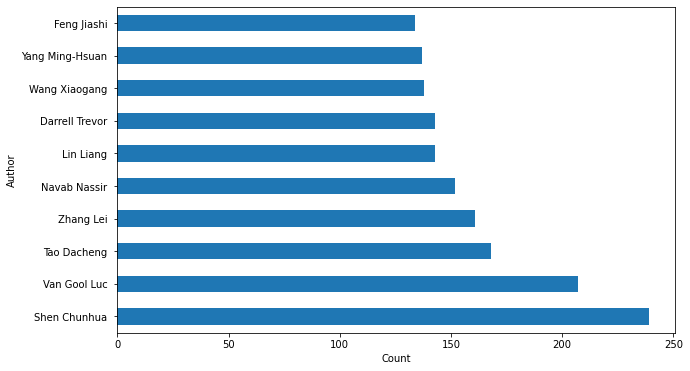

In [15]:
all_authors = sum(data['authors_parsed'], [])
# 拼接所有的作者
authors_names = [' '.join(x) for x in all_authors]
authors_names = pd.DataFrame(authors_names)

# 根据作者频率绘制直方图
plt.figure(figsize=(10, 6))
authors_names[0].value_counts().head(10).plot(kind='barh')

# 修改图配置
names = authors_names[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

## 统计作者第一个字段姓氏的频率

Text(0.5, 0, 'Count')

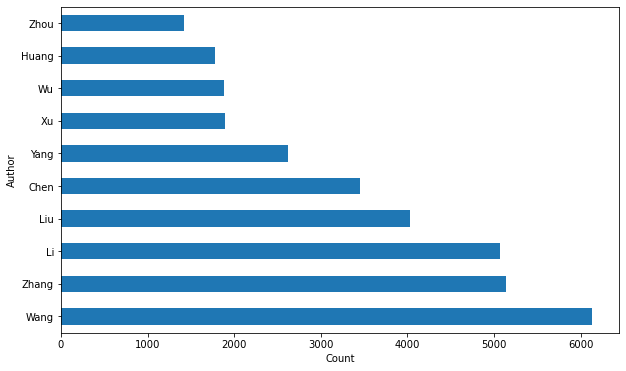

In [16]:
authors_lastnames = [x[0] for x in all_authors]
authors_lastnames = pd.DataFrame(authors_lastnames)

plt.figure(figsize=(10, 6))
authors_lastnames[0].value_counts().head(10).plot(kind='barh')

names = authors_lastnames[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

## 统计作者名字的频率

Text(0.5, 0, 'Count')

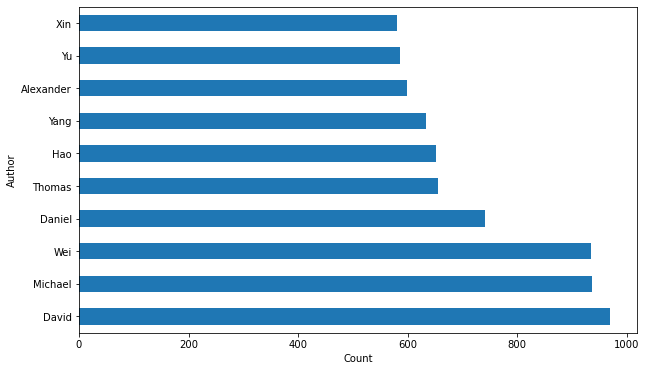

In [19]:
authors_lastnames = [x[1] for x in all_authors]
authors_lastnames = pd.DataFrame(authors_lastnames)

plt.figure(figsize=(10, 6))
authors_lastnames[0].value_counts().head(10).plot(kind='barh')

names = authors_lastnames[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')